## Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

In [26]:
# Объединяю таблицы в одну и отсеиваю по статусу delivered

olist_orders_customers = olist_orders.merge(olist_customers, how='inner', on='customer_id')
delivered_orders = olist_orders_customers[olist_orders_customers.order_status == 'delivered']

# Проверяю таблицу
delivered_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [27]:
delivered_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
dtype: object

In [28]:
# Перевожу формат колонки с датой в формат с названием месяца

delivered_orders.order_purchase_timestamp = delivered_orders.order_purchase_timestamp.dt.to_period('M')

C:\Temp\ipykernel_9360\1240596317.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_orders.order_purchase_timestamp = delivered_orders.order_purchase_timestamp.dt.to_period('M')


In [29]:
# Оставляю только нужные колонки и сортируем df по дате 
    
delivered_orders = delivered_orders[['customer_unique_id','order_id','order_purchase_timestamp']]
delivered_orders = delivered_orders.sort_values('order_purchase_timestamp')

# Проверяю, что получилось
delivered_orders.head()

,customer_unique_id,order_id,order_purchase_timestamp
30709,830d5b7aaa3b6f1e9ad63703bec97d23,bfbd0f9bdef84302105ad712db648a6c,2016-09
97280,3e36312a56bdb312242490706752940b,35d8c6d5e060ad24271ffda186312ef8,2016-10
98321,40b41ade17bb2121b576b07e25ce622b,6e0d2539e48e84296bae6290de41058c,2016-10
77833,4543480cbf99692641f5b35eeae7947f,1970f2fb4b83ff962a75b064abc37f4c,2016-10
68803,746c7bded4ed70487bf7d6461e9f855a,de8f4a82099fe4fa6bcb8952ca51420f,2016-10


In [30]:
# Создаю столбец с месяцем первой покупки, датой первого заказа и соединим колонку с df

first_order = delivered_orders.groupby('customer_unique_id',as_index=False) \
    .agg({'order_purchase_timestamp':'first'})

In [31]:
delivered_orders = delivered_orders.merge(first_order, how='inner',on='customer_unique_id')

# Проверяю, что получилось
delivered_orders.head()

,customer_unique_id,order_id,order_purchase_timestamp_x,order_purchase_timestamp_y
0,830d5b7aaa3b6f1e9ad63703bec97d23,bfbd0f9bdef84302105ad712db648a6c,2016-09,2016-09
1,3e36312a56bdb312242490706752940b,35d8c6d5e060ad24271ffda186312ef8,2016-10,2016-10
2,40b41ade17bb2121b576b07e25ce622b,6e0d2539e48e84296bae6290de41058c,2016-10,2016-10
3,4543480cbf99692641f5b35eeae7947f,1970f2fb4b83ff962a75b064abc37f4c,2016-10,2016-10
4,746c7bded4ed70487bf7d6461e9f855a,de8f4a82099fe4fa6bcb8952ca51420f,2016-10,2016-10


In [32]:
# Переименуем колонки order_purchase_timestamp_x и order_purchase_timestamp_y, для удобства
    
delivered_orders = delivered_orders \
.rename(columns={'order_purchase_timestamp_x':'order_date','order_purchase_timestamp_y':'first_date'})
delivered_orders.head()

,customer_unique_id,order_id,order_date,first_date
0,830d5b7aaa3b6f1e9ad63703bec97d23,bfbd0f9bdef84302105ad712db648a6c,2016-09,2016-09
1,3e36312a56bdb312242490706752940b,35d8c6d5e060ad24271ffda186312ef8,2016-10,2016-10
2,40b41ade17bb2121b576b07e25ce622b,6e0d2539e48e84296bae6290de41058c,2016-10,2016-10
3,4543480cbf99692641f5b35eeae7947f,1970f2fb4b83ff962a75b064abc37f4c,2016-10,2016-10
4,746c7bded4ed70487bf7d6461e9f855a,de8f4a82099fe4fa6bcb8952ca51420f,2016-10,2016-10


In [33]:
# Группирую данные в колонках и вычисляю количество уникальных значений в столбце 'customer_unique_id' для каждой группы

delivered_orders = delivered_orders.groupby(['first_date','order_date']) \
    .agg({'customer_unique_id':'count'})

In [34]:
# Считаю когорту
    
def cohort_period(df):
    df['cohort_period'] = np.arange(len(df)) + 1
    return df

delivered_orders = delivered_orders.groupby(level=0).apply(cohort_period)
delivered_orders.head()

customer_unique_id  cohort_period
first_date order_date                                   
2016-09    2016-09                      1              1
2016-10    2016-10                    265              1
           2017-04                      1              2
           2017-07                      1              3
           2017-09                      1              4

In [35]:
# Использую метод pivot_table для преобразования delivered_orders в сводную таблицу

delivered_orders = delivered_orders \
.pivot_table(columns='cohort_period', index = 'first_date',values='customer_unique_id')

In [36]:
# Вычисляю и нахожу когорту с максимальным retention

dff = delivered_orders[1]
retention = delivered_orders.divide(dff, axis=0).round(4)
retention[retention[3] == retention[3].max()].index

PeriodIndex(['2017-09'], dtype='period[M]', name='first_date')

In [37]:
# Получаю таблицу

retention

cohort_period,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
first_date,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,0.0038,0.0038,0.0038,0.0038,0.0038,0.0038,0.0075,0.0075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12,1.0,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.0027,0.0027,0.0013,0.0040,0.0013,0.0040,0.0013,0.0013,0.0040,0.0013,0.0067,0.0040,0.0013,0.0013,0.0027,0.0040,0.0013
2017-02,1.0,0.0018,0.0030,0.0012,0.0042,0.0012,0.0024,0.0018,0.0012,0.0018,0.0012,0.0030,0.0012,0.0018,0.0012,0.0006,0.0006,0.0018
2017-03,1.0,0.0047,0.0035,0.0047,0.0035,0.0016,0.0016,0.0031,0.0031,0.0008,0.0035,0.0012,0.0020,0.0012,0.0016,0.0024,0.0008,0.0012
2017-04,1.0,0.0066,0.0026,0.0022,0.0026,0.0026,0.0039,0.0031,0.0031,0.0018,0.0026,0.0009,0.0004,0.0004,0.0009,0.0009,0.0018,NaN
2017-05,1.0,0.0048,0.0045,0.0028,0.0028,0.0034,0.0045,0.0014,0.0026,0.0031,0.0026,0.0034,0.0023,0.0003,0.0017,0.0020,NaN,NaN
2017-06,1.0,0.0052,0.0042,0.0042,0.0032,0.0039,0.0036,0.0023,0.0013,0.0019,0.0029,0.0039,0.0016,0.0019,0.0032,NaN,NaN,NaN


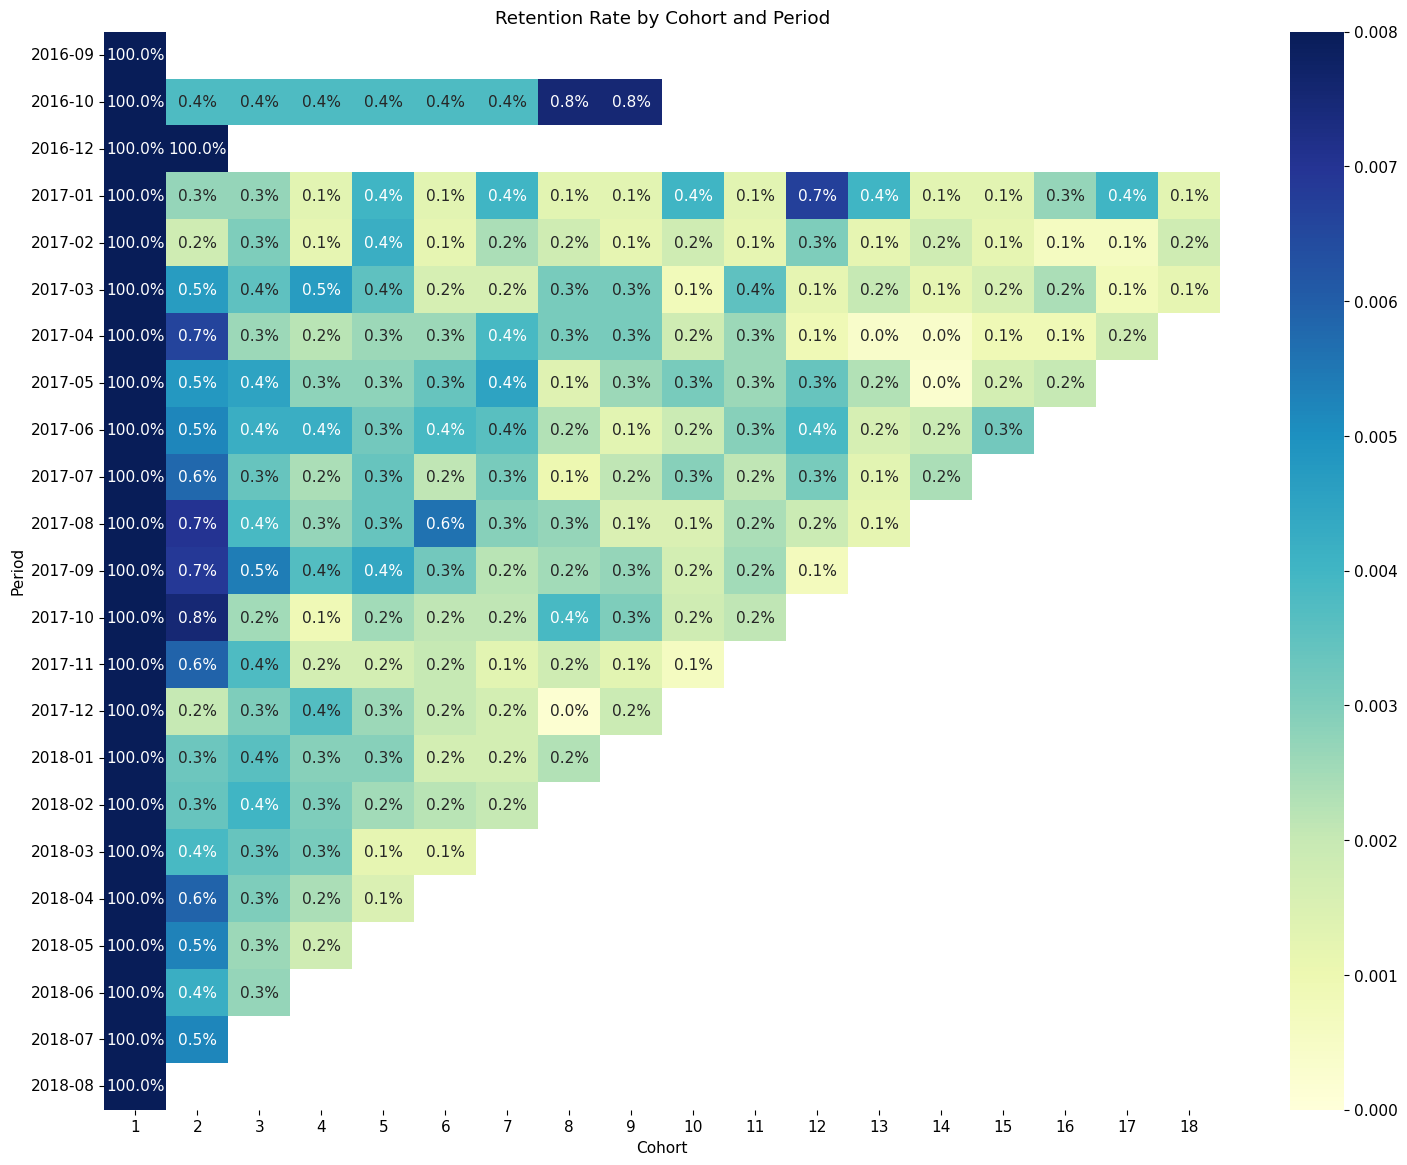

In [38]:
plt.rcParams['font.size'] = '11'
plt.figure(figsize=(18,14))

ax = sns.heatmap(data=retention, annot=True, fmt='.1%', vmin=0.0, vmax=0.008, cmap='YlGnBu')
ax.set_yticklabels(retention.index, rotation=0)
ax.set_title('Retention Rate by Cohort and Period')
ax.set_xlabel('Cohort')
ax.set_ylabel('Period')

fig=ax.get_figure()
fig.savefig("Retention Counts.png")

plt.show()